# Tweets | NLP Cosine Similarity | TF-IDF

In [2]:
# Import Libraries
# basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string

# machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# nlp library
import nltk

# other library
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

In [3]:
# read data
data = pd.read_csv('./data/tweets.csv', encoding='latin')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [8]:
# let cut the data down to only 1000 row
df = data.iloc[0:1000]
df

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
995,0,1468055266,Mon Apr 06 23:28:41 PDT 2009,NO_QUERY,ohmigosh_dusti,@t_wolfe i miss u too. i'm totally comin back...
996,0,1468055472,Mon Apr 06 23:28:43 PDT 2009,NO_QUERY,tiphaniebrooke,@sniffinglue ohhh. I love it. ps I'm sad we di...
997,0,1468055604,Mon Apr 06 23:28:45 PDT 2009,NO_QUERY,rinahannah,And somehow I still end up in this place
998,0,1468055791,Mon Apr 06 23:28:49 PDT 2009,NO_QUERY,ecjc,"@kisluvkis oh that is very sad, poor boy."


In [9]:
# Only text column
df = df[['Text']]
df

,Text
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew
...,...
995,@t_wolfe i miss u too. i'm totally comin back...
996,@sniffinglue ohhh. I love it. ps I'm sad we di...
997,And somehow I still end up in this place
998,"@kisluvkis oh that is very sad, poor boy."


### Word Cloud

In [10]:
wc = WordCloud(background_color="black", max_words=1000,stopwords=STOPWORDS,max_font_size=40)

In [11]:
wc.generate(" ".join(df['Text']))

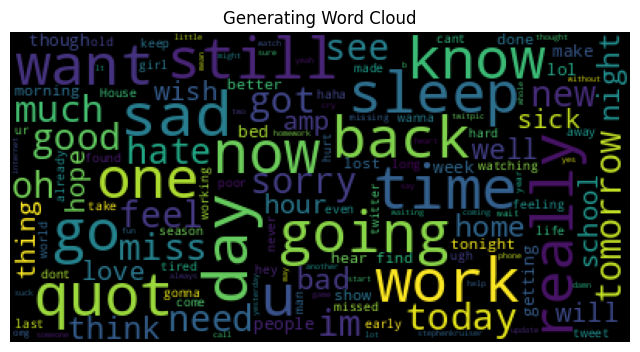

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.title('Generating Word Cloud')
plt.axis('off')
plt.show()

## NLP
### Clean Text

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [18]:
text = df['Text'].apply(lambda x:clean_text(x))
# make dictionary
text_ = {'clean_text': text}
# make dataframe
df_clean_text = pd.DataFrame.from_dict(text_)
df_clean_text.head()

,clean_text
0,is upset that he cant update his facebook by t...
1,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire
3,nationwideclass no its not behaving at all im ...
4,kwesidei not the whole crew


## Tokenization, Stop Words, Stemming

In [19]:
def remove_stopwords(text):
    #tokenization words
    words = nltk.word_tokenize(text)

    # remove meaningless words
    stop_words = nltk.corpus.stopwords.words('english')
    add_stop_words =    add_stop_words = ['u', 'im', 'um', 'aaaaand', 'aaronrva', 'aaw', 'ï¿½n', 'ï¿½tieï¿½', 'abl', 'abt']
    stop_words = stop_words + add_stop_words
    filtered_words = [word for word in words if word not in stop_words]
    
    # streaming word to base vocab
    stemmer = nltk.SnowballStemmer("english")
    filtered_words = [stemmer.stem(word) for word in filtered_words]
    return filtered_words


In [20]:
df['vectors'] = df_clean_text['clean_text'].apply(remove_stopwords)
df.head()

/tmp/ipykernel_11361/1880888179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vectors'] = df_clean_text['clean_text'].apply(remove_stopwords)


,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"


## Bag of Words (BOWs)

In [21]:
def custom_token(text):
    # specific format to feed into count vectorizer and tf-idf
    result = text.split(' ')
    return result

In [22]:
# see example of format that we need to feed into count vectorization and tf-idf
corpus = [' '.join(words) for words in df['vectors']]
corpus[:2]

['upset cant updat facebook text might cri result school today also blah',
 'kenichan dive mani time ball manag save rest go bound']

## Count Vectorizer

In [24]:
# Initialize the CountVectorizer with custom token
count_vectorizer = CountVectorizer(tokenizer=custom_token)
# Fit the vectorizer and transform the text into a term-document matrix
count_vect = count_vectorizer.fit_transform(corpus)

/home/patricia/Documentos/NLP/nlp_env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
count_vectorizer.get_feature_names_out()

array(['abl', 'absolut', 'accent', ..., 'zip', 'zone', 'zoo'],
      dtype=object)

In [26]:
count_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
count_vect.toarray().shape

(1000, 2776)

In [28]:
df_count_vect = pd.DataFrame(count_vect.toarray(),
                             columns=count_vectorizer.get_feature_names_out(),
                             )
display(df)
display(df_count_vect)

,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"
...,...,...
995,@t_wolfe i miss u too. i'm totally comin back...,"[twolf, miss, total, comin, back, tho, lastnig..."
996,@sniffinglue ohhh. I love it. ps I'm sad we di...,"[sniffinglu, ohhh, love, ps, sad, didnt, get, ..."
997,And somehow I still end up in this place,"[somehow, still, end, place]"
998,"@kisluvkis oh that is very sad, poor boy.","[kisluvki, oh, sad, poor, boy]"


,abl,absolut,accent,accept,access,accid,accident,accompani,accord,account,...,yrs,yu,yucki,yup,zac,zaydia,zero,zip,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Vectorizer

In [29]:
# Initialize the TfidfVectorizer with the tokenizer and stemmer
tf_vectorizer = TfidfVectorizer(tokenizer=custom_token)

In [30]:
# Fit the vectorizer and transform the text into a TF-IDF matrix
tf_vect = tf_vectorizer.fit_transform(corpus)

print(tf_vectorizer.get_feature_names_out())
print(tf_vect.toarray())

['abl' 'absolut' 'accent' ... 'zip' 'zone' 'zoo']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/patricia/Documentos/NLP/nlp_env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
df_tf_vect = pd.DataFrame(tf_vect.toarray(),
                          columns=tf_vectorizer.get_feature_names_out(),
                          )
display(df)
display(df_tf_vect)

,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"
...,...,...
995,@t_wolfe i miss u too. i'm totally comin back...,"[twolf, miss, total, comin, back, tho, lastnig..."
996,@sniffinglue ohhh. I love it. ps I'm sad we di...,"[sniffinglu, ohhh, love, ps, sad, didnt, get, ..."
997,And somehow I still end up in this place,"[somehow, still, end, place]"
998,"@kisluvkis oh that is very sad, poor boy.","[kisluvki, oh, sad, poor, boy]"


,abl,absolut,accent,accept,access,accid,accident,accompani,accord,account,...,yrs,yu,yucki,yup,zac,zaydia,zero,zip,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [32]:
# store both vectorizers in matrix as np array
count_vect = df_count_vect.to_numpy()
tf_vect = df_tf_vect.to_numpy()

In [33]:
df_count_cosine = pd.DataFrame(cosine_similarity(count_vect, count_vect))
df_count_cosine

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.0,0.000000,0.129099,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.08165,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.0,1.000000,0.000000,0.235702,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.144338,0.000000,0.000000,0.0,0.000000,0.000000
3,0.129099,0.0,0.000000,1.000000,0.000000,0.0,0.11547,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.0,0.235702,0.000000,1.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.091287
996,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.204124,0.0,0.0,...,0.182574,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.158114,0.000000
997,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.129099,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
998,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.158114,0.0,0.000000,0.000000,0.158114,0.0,1.000000,0.000000


In [34]:
df_tf_cosine = pd.DataFrame(cosine_similarity(tf_vect, tf_vect))
df_tf_cosine

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.0,0.000000,0.061202,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.034056,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000
2,0.000000,0.0,1.000000,0.000000,0.210749,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.070104,0.000000,0.00000,0.0,0.00000,0.000000
3,0.061202,0.0,0.000000,1.000000,0.000000,0.0,0.063986,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000
4,0.000000,0.0,0.210749,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.00000,0.0,0.00000,0.036046
996,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.124309,0.0,0.0,...,0.066508,0.0,0.000000,0.0,0.000000,0.000000,1.00000,0.0,0.07399,0.000000
997,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.062186,0.0,0.000000,0.0,0.000000,0.000000,0.00000,1.0,0.00000,0.000000
998,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.124409,0.0,0.000000,0.000000,0.07399,0.0,1.00000,0.000000


In [35]:
print(df['Text'].iloc[2])
print(df['vectors'].iloc[2])

my whole body feels itchy and like its on fire 
['whole', 'bodi', 'feel', 'itchi', 'like', 'fire']


In [36]:
print(df['Text'].iloc[4])
print(df['vectors'].iloc[4])

@Kwesidei not the whole crew 
['kwesidei', 'whole', 'crew']


In [37]:
# identifiy similarity between observations of count vectorizer
corr = 0.9
df_count_cosine_corr = df_count_cosine[df_count_cosine>=corr]
na_count = len(df_count_cosine_corr.columns) -1

In [38]:
for index in df_count_cosine_corr.index:
    if df_count_cosine_corr[index].isna().sum() == na_count:
        df_count_cosine_corr.drop(index,inplace=True)
        na_count -=1
df_count_cosine_corr.fillna(0, inplace=True)
df_count_cosine_corr

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print(df['Text'].iloc[5])
print(df['vectors'].iloc[5])

Need a hug 
['need', 'hug']


In [40]:
print(df['Text'].iloc[53])
print(df['vectors'].iloc[53])

I need a hug 
['need', 'hug']


In [41]:
# identifiy similarity between observations of tf-idf vectorizer
corr = 0.90
df_tf_cosine_corr = df_tf_cosine[df_tf_cosine>=corr]
na_count = len(df_tf_cosine_corr.columns) - 1

for index in df_tf_cosine_corr.index:
    if df_tf_cosine_corr[index].isna().sum() == na_count:
        df_tf_cosine_corr.drop(columns=index, inplace=True)
        df_tf_cosine_corr.drop(index, inplace=True)
        na_count -= 1
df_tf_cosine_corr.fillna(0, inplace=True)
df_tf_cosine_corr

,5,53,207,213,245,248,252,356,544,560,616,624,672,734,739,869,880,887,890,899
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
53,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
207,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
245,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
248,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
252,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000
560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [43]:
print(df['Text'].iloc[887])
print(df['vectors'].iloc[887])

so far i have 311 on all my sites put together,  most of them were me checking out the updates i made......
['far', 'site', 'put', 'togeth', 'check', 'updat', 'made']


In [44]:
print(df['Text'].iloc[899])
print(df['vectors'].iloc[899])

so far i have 311 veiws on all my sites put together,  most of them were me checking out the updates i made......
['far', 'veiw', 'site', 'put', 'togeth', 'check', 'updat', 'made']


The main difference between Count Vectorizer and TF-IDF Vectorizer lies in the weighing of the words.

**Count Vectorizer**
assigns equal importance to all words.
suitable for tasks where the frequency of occurrence of a word is important, such as sentiment analysis, spam detection, etc.

**TF-IDF Vectorizer**
assigns higher weights to words that are more important (have higher TF-IDF values), which means it gives less importance to common words.
suitable for tasks where the importance of words relative to the entire corpus is important, such as document classification, information retrieval, etc.